# Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Config Check


In [ ]:
%cd /content/drive/MyDrive/Milestone- G5

/content/drive/MyDrive/Milestone- G5


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16567, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16567 (delta 22), reused 29 (delta 13), pack-reused 16522
Receiving objects: 100% (16567/16567), 15.02 MiB | 15.03 MiB/s, done.
Resolving deltas: 100% (11381/11381), done.


In [ ]:
%cd yolov5

/content/drive/MyDrive/Milestone- G5/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_

In [ ]:
!nvidia-smi

Mon Apr 22 12:55:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
torch.__version__, torch.cuda.get_device_properties(0)

('2.2.1+cu121',
 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40))

# Data Re-arrangement

In [ ]:
import shutil

try:
    shutil.copy('/content/drive/MyDrive/Milestone- G5/section1-group5/dataset.yaml', '/content/drive/MyDrive/Milestone- G5/yolov5')
    print(f"'/content/drive/MyDrive/Milestone- G5/section1-group5/dataset.yaml' copied successfully to '/content/drive/MyDrive/Milestone- G5/yolov5'.")
except Exception as e:
    print(f"Error: {e}")

'/content/drive/MyDrive/Milestone- G5/section1-group5/dataset.yaml' copied successfully to '/content/drive/MyDrive/Milestone- G5/yolov5'.


# Architecture

In [ ]:
%pwd

'/content/drive/MyDrive/Milestone- G5/yolov5'

For training we used yolov5s

In [ ]:
%cat models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

Dataset for training




In [ ]:
%cat dataset.yaml

path: /content/drive/MyDrive/Milestone- G5/section1-group5 
train: /content/drive/MyDrive/Milestone- G5/section1-group5/train
val: /content/drive/MyDrive/Milestone- G5/section1-group5/val
test: /content/drive/MyDrive/Milestone- G5/section1-group5/test

nc: 1  
names: ['Signboard']

# Training by yolov5s

In [ ]:
!python train.py --batch-size -1 --epochs 100 --data dataset.yaml --cfg models/yolov5s.yaml --name yolov5s_results  --cache

2024-04-22 13:26:47.625556: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 13:26:47.625615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 13:26:47.632369: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, s

Model trained successfully

In [15]:
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import matplotlib.image as img

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

Text(0.5, 1.0, 'R Curve')

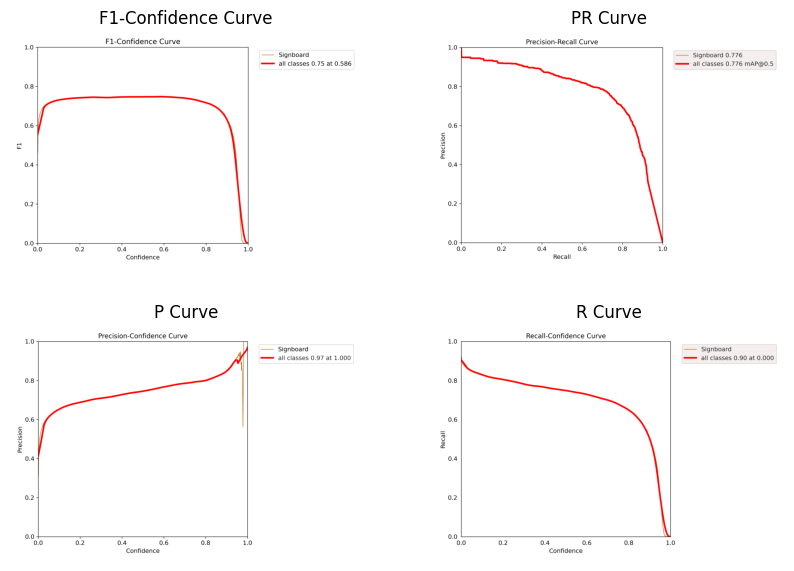

In [ ]:
fig = plt.figure(figsize=(10, 7))

Image1 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/F1_curve.png')
Image2 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/PR_curve.png')
Image3 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/P_curve.png')
Image4 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/R_curve.png')

fig.add_subplot(2, 2, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("F1-Confidence Curve")

fig.add_subplot(2, 2, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("PR Curve")

fig.add_subplot(2, 2, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("P Curve")

fig.add_subplot(2, 2, 4)
plt.imshow(Image4)
plt.axis('off')
plt.title("R Curve")

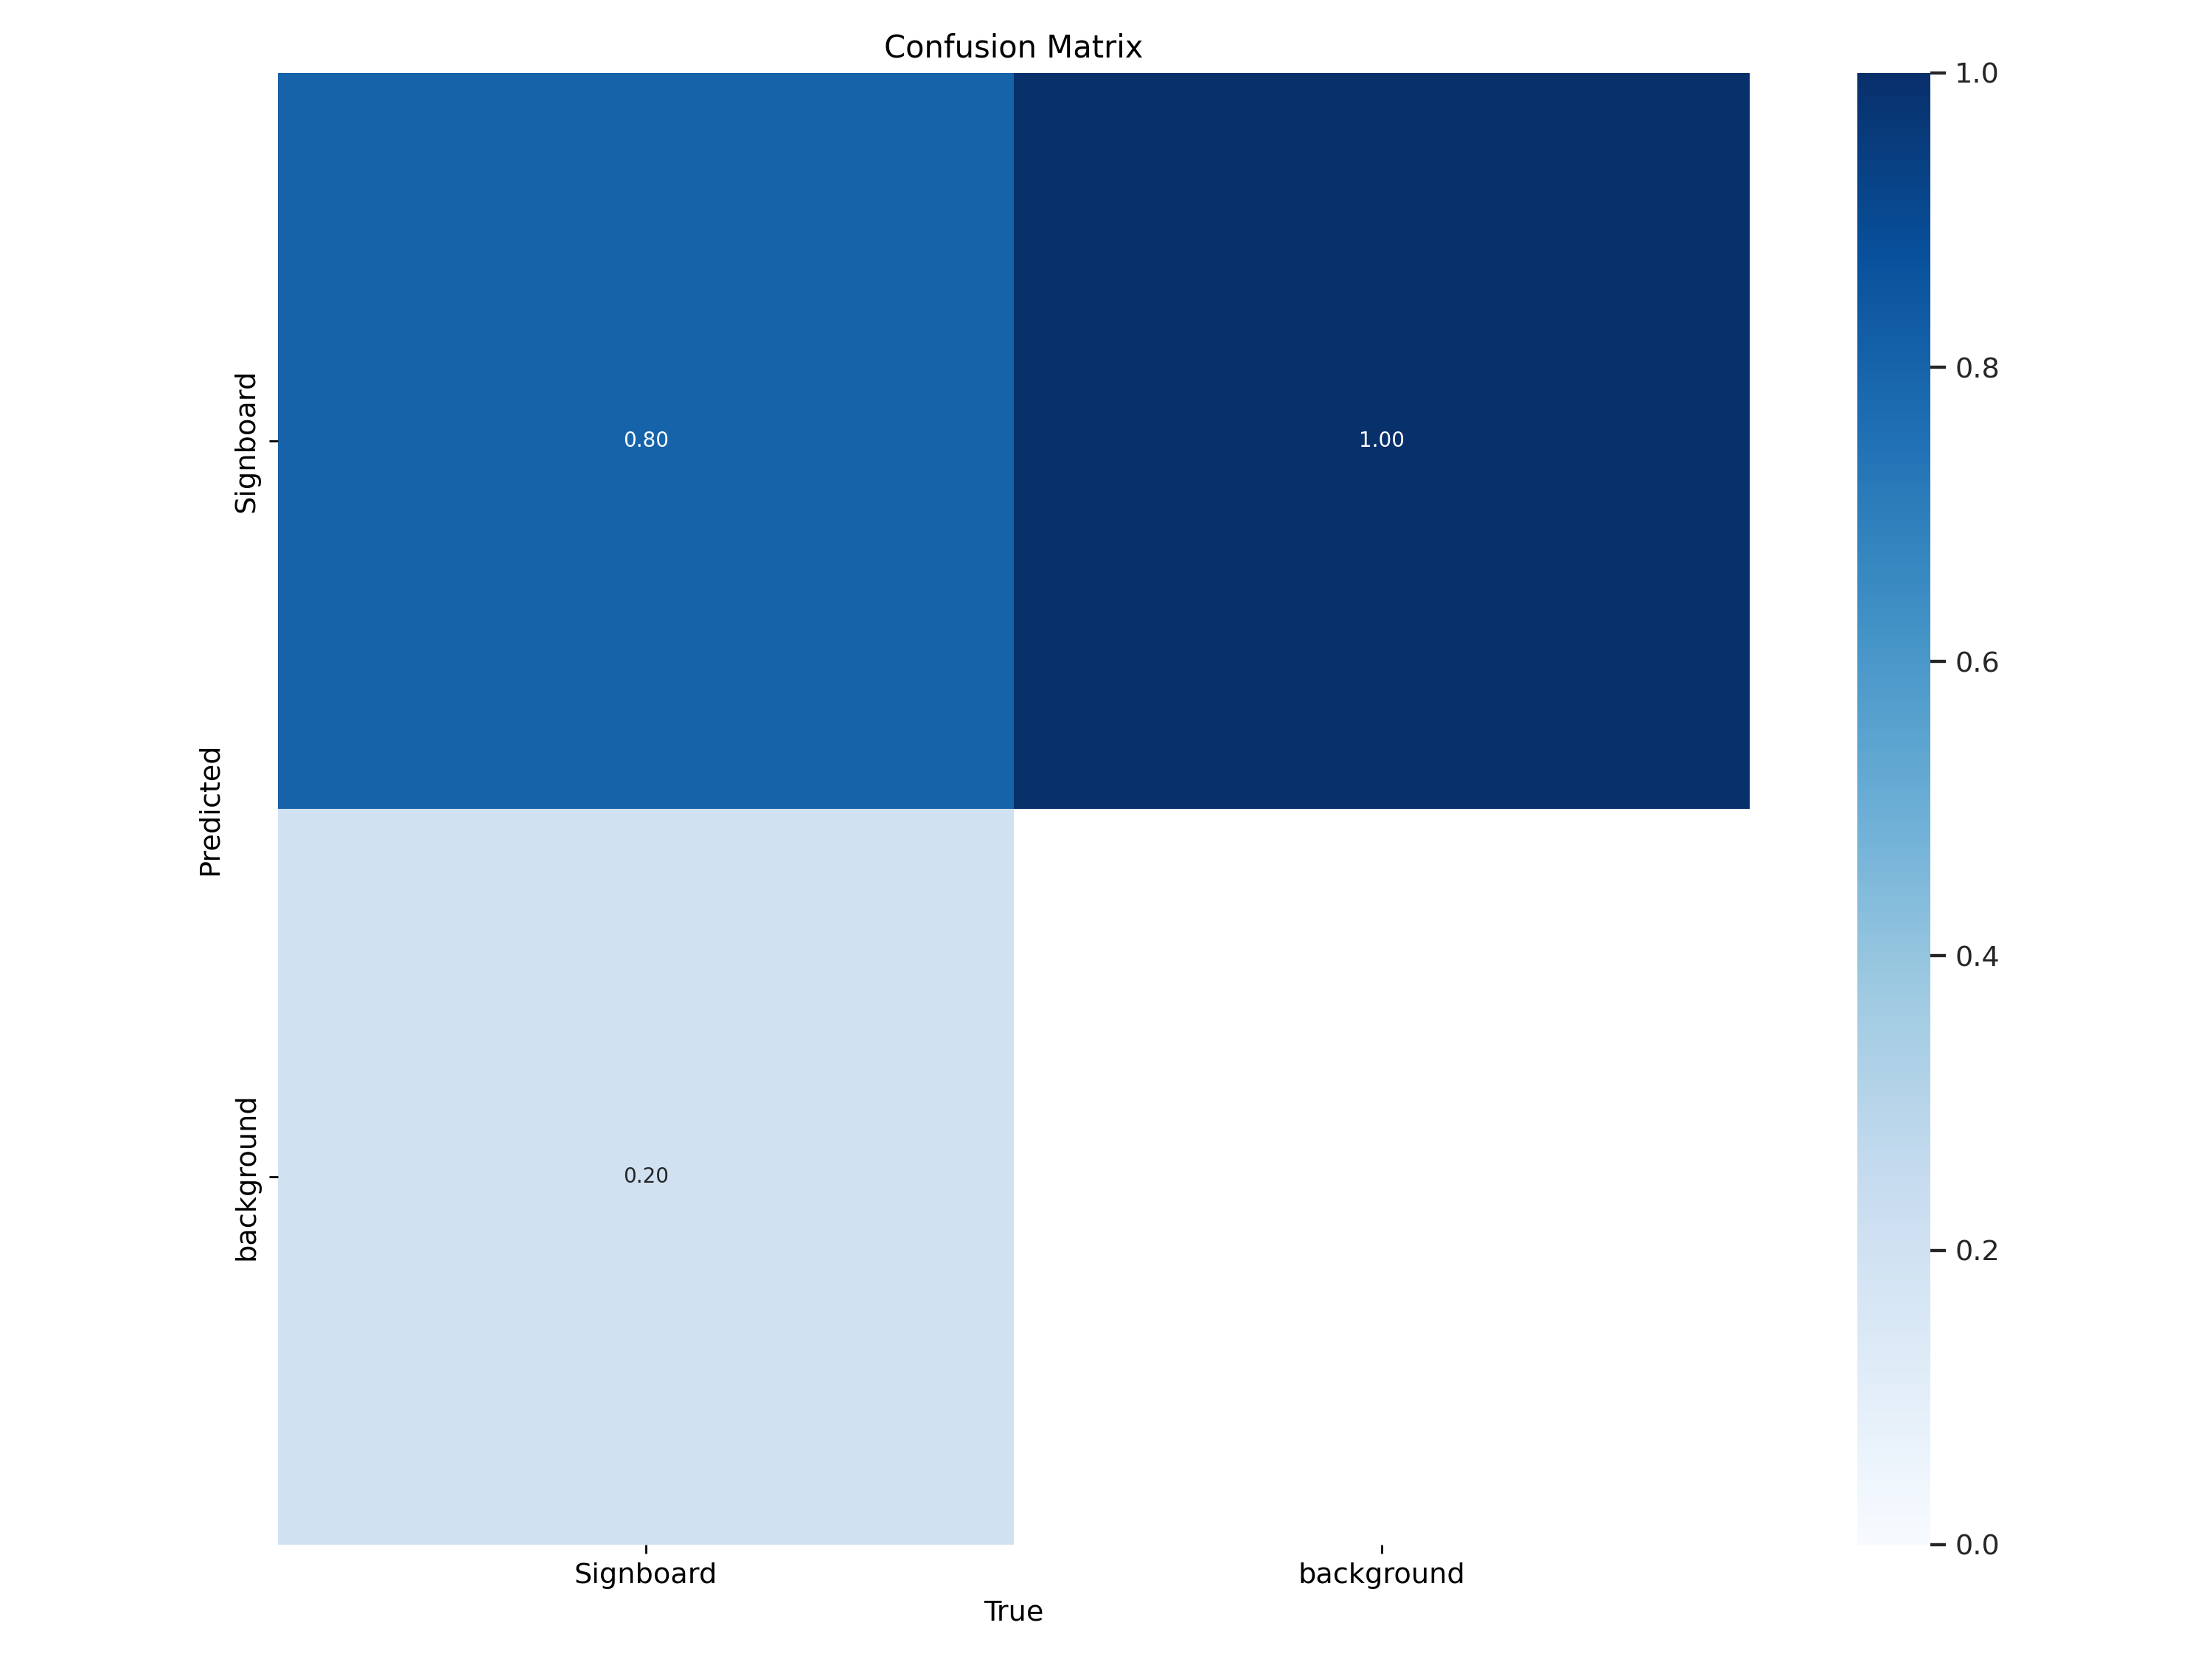

In [ ]:
Image(filename='/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/confusion_matrix.png', width=800)

In [ ]:
results = pd.read_csv('/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/results.csv')
results.head(10)

epoch        train/box_loss        train/obj_loss  \
0                     0              0.089284              0.036875   
1                     1              0.057901              0.030310   
2                     2              0.049010              0.026882   
3                     3              0.040414              0.024727   
4                     4              0.035626              0.024772   
5                     5              0.032889              0.024299   
6                     6              0.030952              0.023222   
7                     7              0.029691              0.022979   
8                     8              0.029343              0.022832   
9                     9              0.028386              0.022551   

         train/cls_loss     metrics/precision        metrics/recall  \
0                     0               0.35546               0.49907   
1                     0               0.37969               0.54793   
2                     0               0.52106               0.70130   
3                     0               0.63996               0.72659   
4                     0               0.66565               0.69573   
5                     0               0.67393               0.74459   
6                     0               0.67065               0.74335   
7                     0               0.70521               0.71181   
8                     0               0.70614               0.72356   
9                     0               0.69010               0.71676   

        metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
0               0.33570               0.12340              0.060947   
1               0.37925               0.16343              0.054107   
2               0.57391               0.22970              0.049335   
3               0.69825               0.38145              0.035105   
4               0.70830               0.43609              0.030424   
5               0.75491               0.49104              0.028066   
6               0.72529               0.45472              0.028174   
7               0.74983               0.49112              0.028470   
8               0.76585               0.51950              0.026892   
9               0.73570               0.48583              0.027146   

           val/obj_loss          val/cls_loss                 x/lr0  \
0              0.035780                     0              0.070714   
1              0.021535                     0              0.040649   
2              0.022784                     0              0.010518   
3              0.017690                     0              0.009703   
4              0.017515                     0              0.009703   
5              0.016634                     0              0.009604   
6              0.019131                     0              0.009505   
7              0.017184                     0              0.009406   
8              0.016589                     0              0.009307   
9              0.017245                     0              0.009208   

                  x/lr1                 x/lr2  
0              0.003254              0.003254  
1              0.006522              0.006522  
2              0.009724              0.009724  
3              0.009703              0.009703  
4              0.009703              0.009703  
5              0.009604              0.009604  
6              0.009505              0.009505  
7              0.009406              0.009406  
8              0.009307              0.009307  
9              0.009208              0.009208

In [ ]:
results.describe()

epoch        train/box_loss        train/obj_loss  \
count            100.000000            100.000000            100.000000   
mean              49.500000              0.021868              0.016312   
std               29.011492              0.009571              0.004555   
min                0.000000              0.014557              0.010980   
25%               24.750000              0.016847              0.012797   
50%               49.500000              0.019782              0.015195   
75%               74.250000              0.023407              0.018696   
max               99.000000              0.089284              0.036875   

             train/cls_loss     metrics/precision        metrics/recall  \
count                 100.0            100.000000            100.000000   
mean                    0.0              0.707144              0.747394   
std                     0.0              0.057517              0.039802   
min                     0.0              0.355460              0.499070   
25%                     0.0              0.696610              0.740163   
50%                     0.0              0.718885              0.753875   
75%                     0.0              0.733483              0.769300   
max                     0.0              0.767720              0.794680   

            metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
count            100.000000            100.000000            100.000000   
mean               0.756404              0.534798              0.025942   
std                0.062189              0.070708              0.005389   
min                0.335700              0.123400              0.023742   
25%                0.762100              0.537995              0.024266   
50%                0.769270              0.554940              0.024514   
75%                0.774820              0.561120              0.025379   
max                0.789900              0.574710              0.060947   

               val/obj_loss          val/cls_loss                 x/lr0  \
count            100.000000                 100.0            100.000000   
mean               0.018663                   0.0              0.006116   
std                0.002336                   0.0              0.007939   
min                0.015930                   0.0              0.000298   
25%                0.017044                   0.0              0.002748   
50%                0.018340                   0.0              0.005198   
75%                0.019735                   0.0              0.007649   
max                0.035780                   0.0              0.070714   

                      x/lr1                 x/lr2  
count            100.000000            100.000000  
mean               0.005093              0.005093  
std                0.002792              0.002792  
min                0.000298              0.000298  
25%                0.002748              0.002748  
50%                0.005099              0.005099  
75%                0.007451              0.007451  
max                0.009724              0.009724

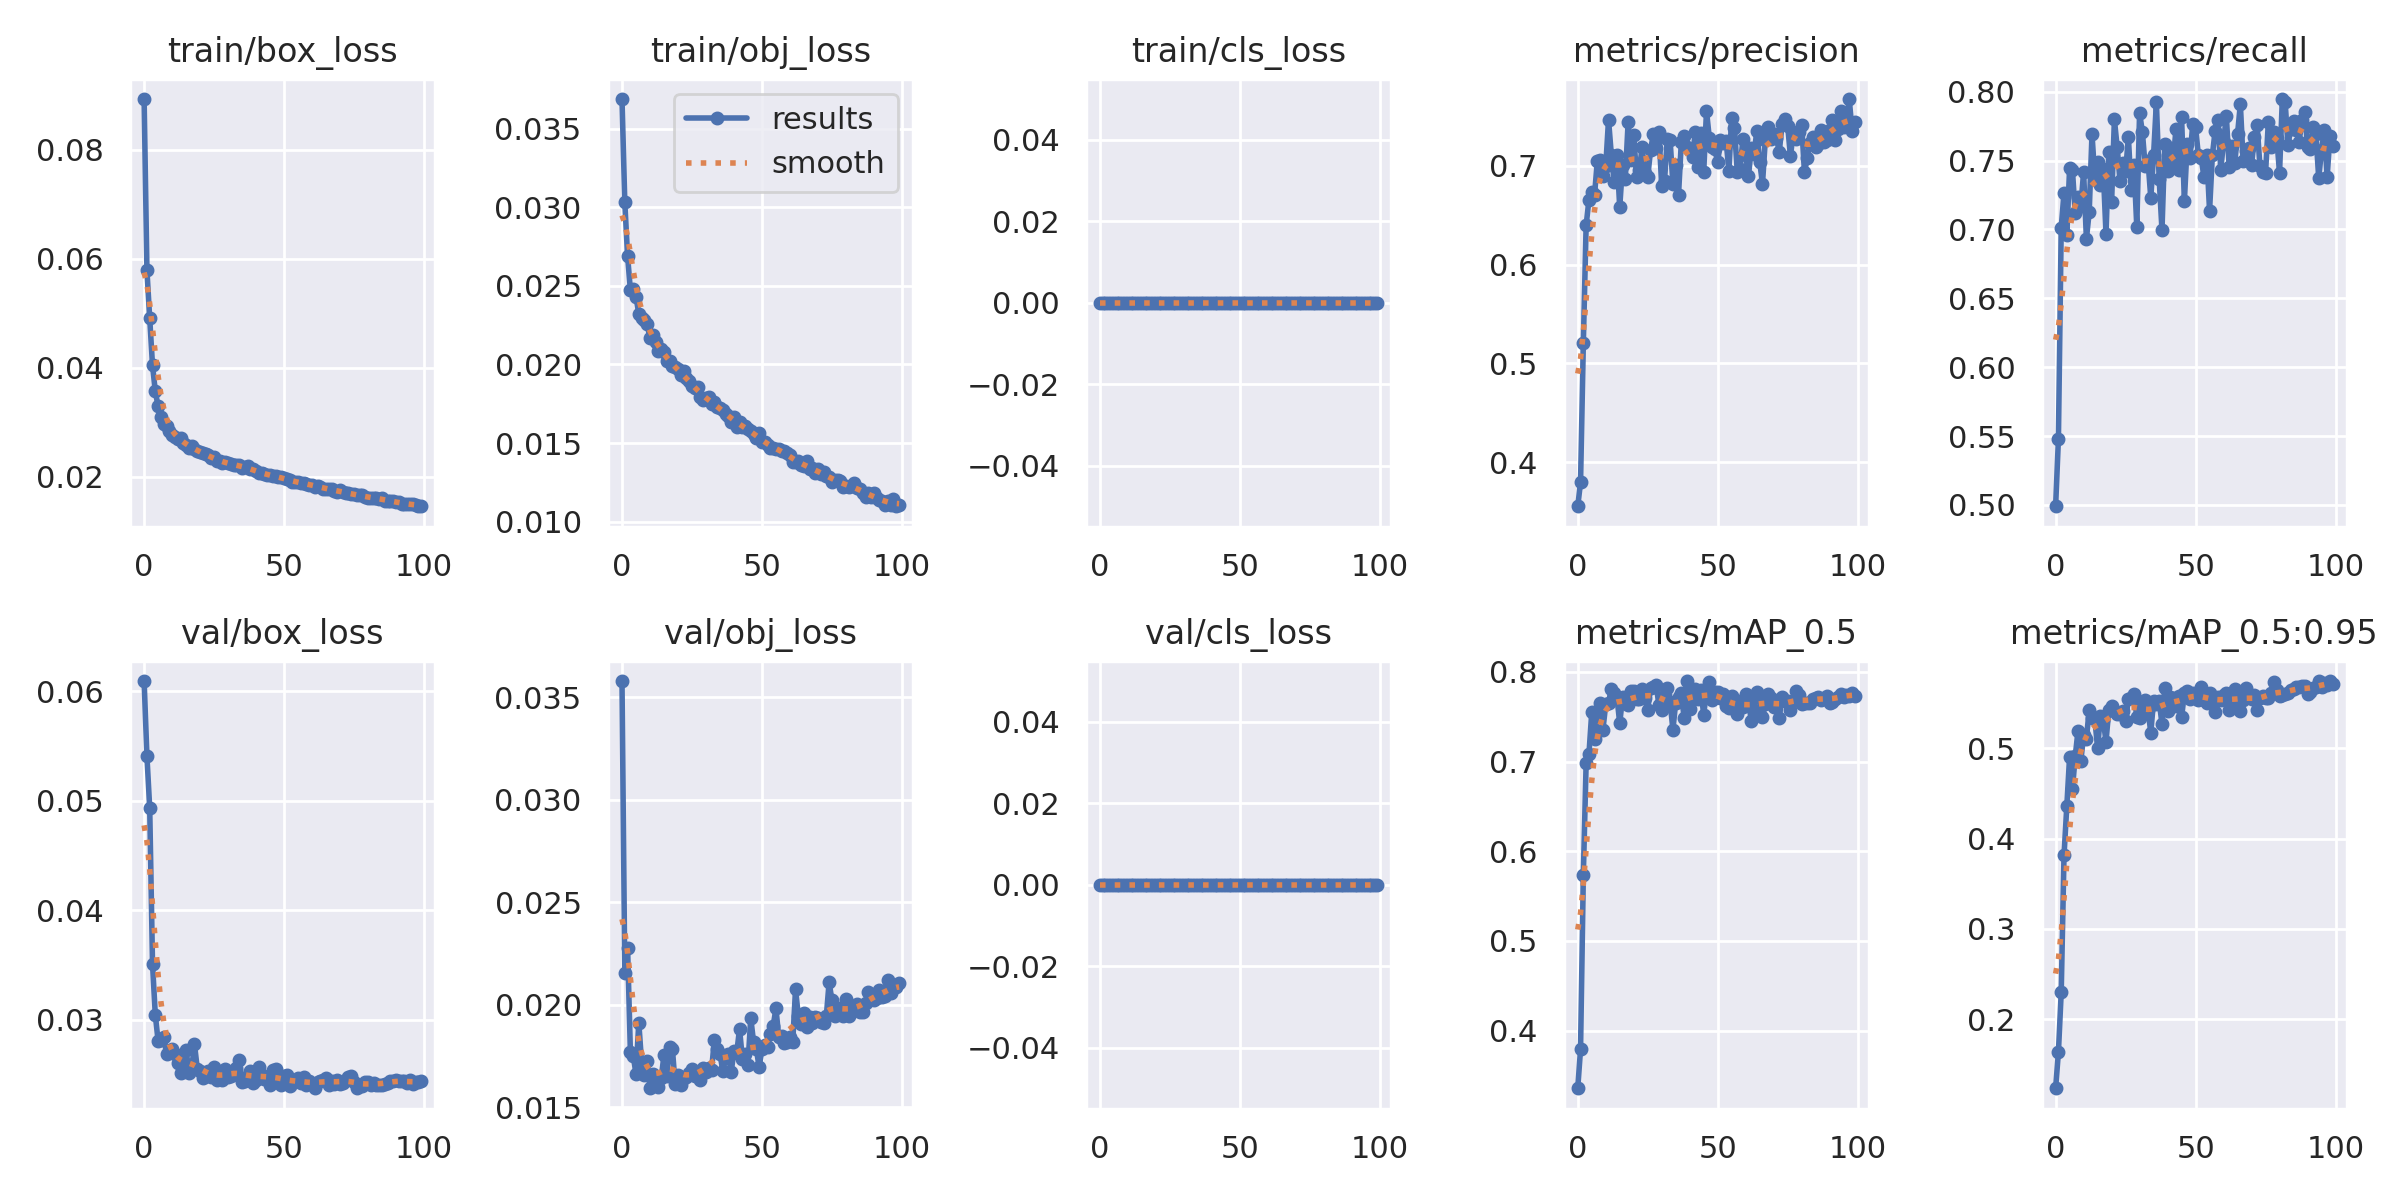

In [ ]:
Image(filename='/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/results.png', width=800)

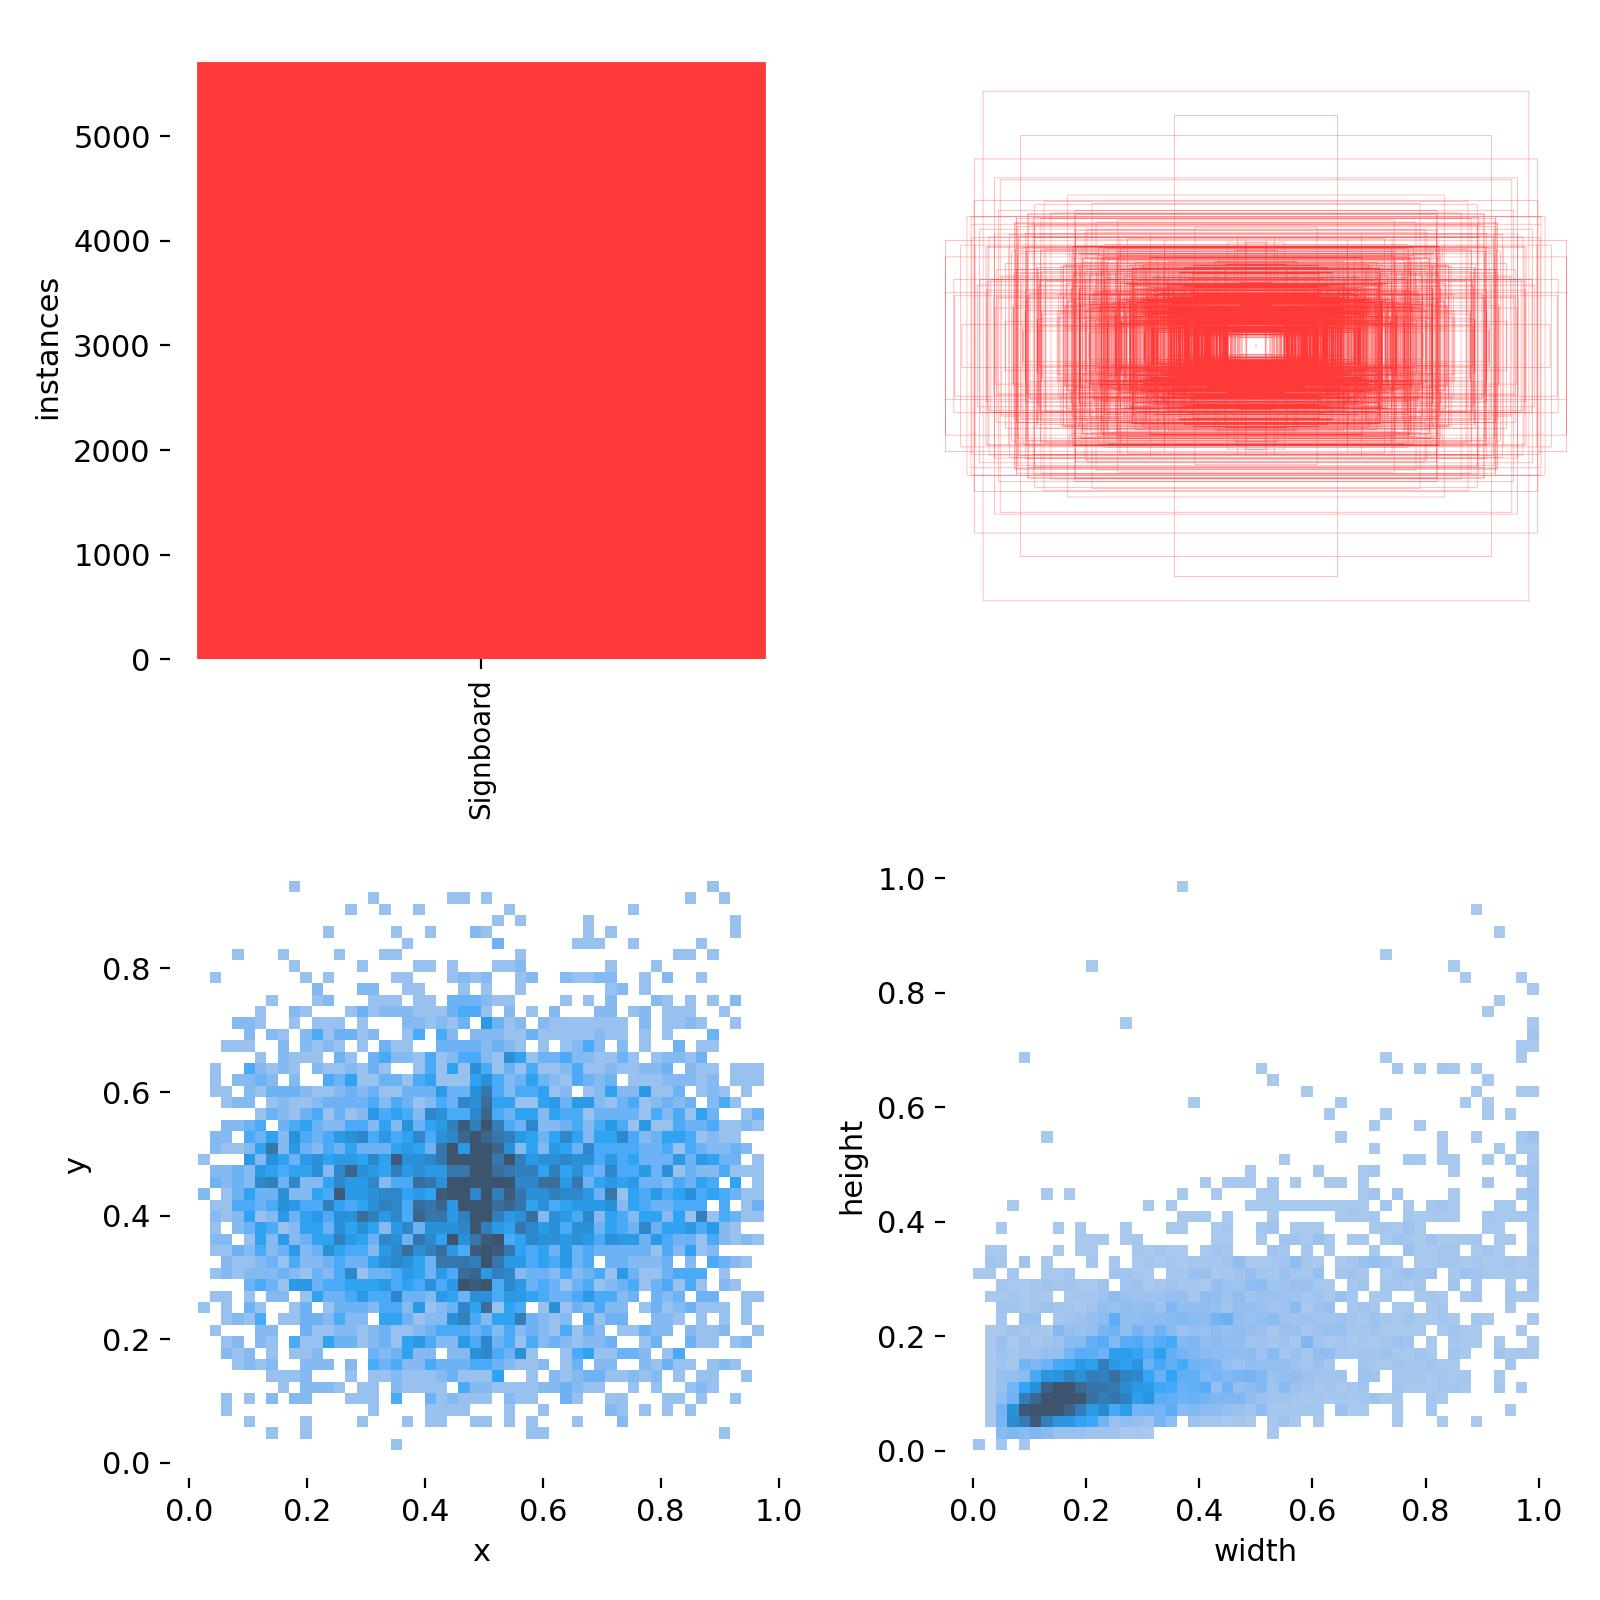

In [ ]:
Image(filename='/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/labels.jpg', width=600)

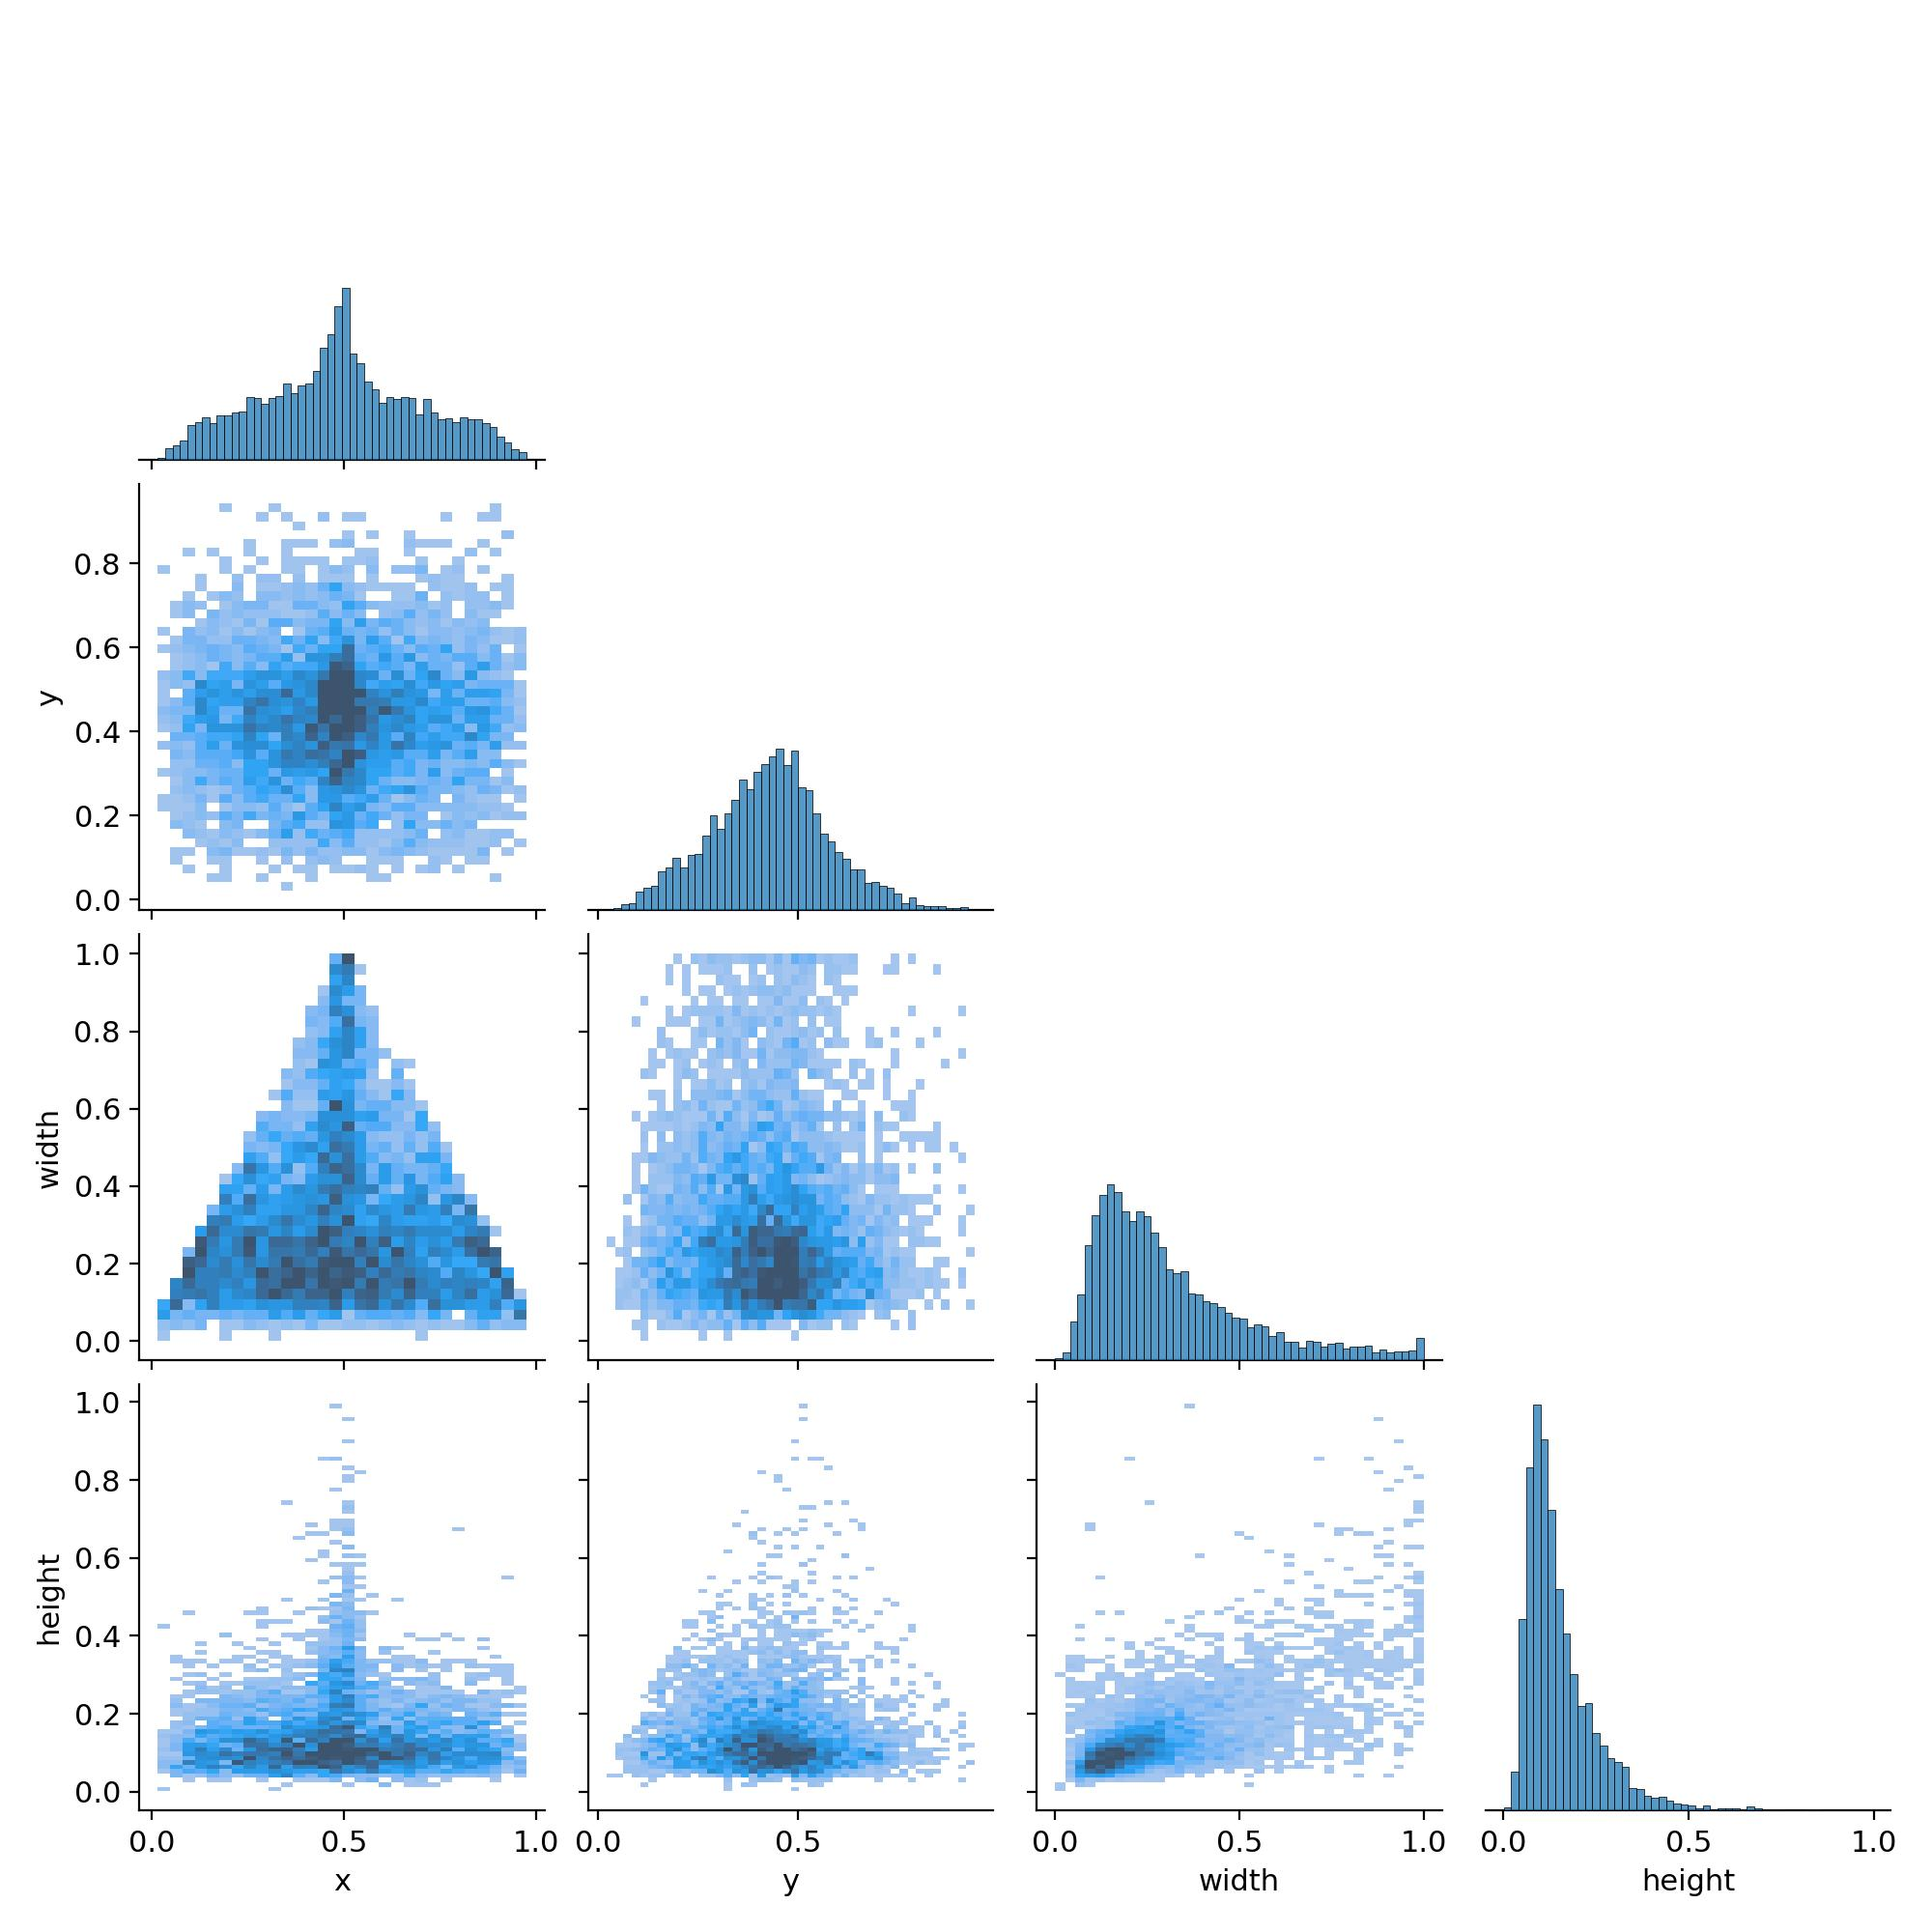

In [ ]:
Image(filename='/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/labels_correlogram.jpg', width=600)

Text(0.5, 1.0, 'Predictions')

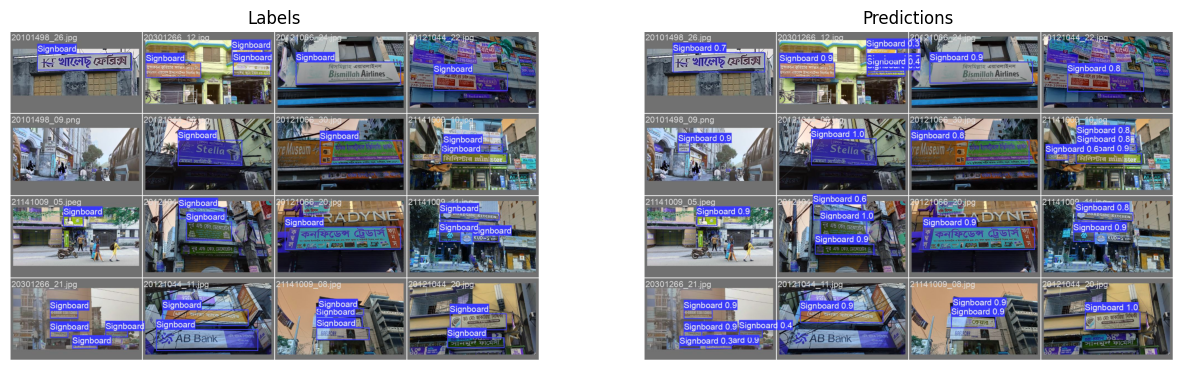

In [ ]:
fig = plt.figure(figsize=(15, 10))

Image1 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/val_batch0_pred.jpg')

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Labels")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Predictions")

# Validation using best.pt

In [25]:
%cd /content/drive/MyDrive/Milestone- G5/yolov5

/content/drive/MyDrive/Milestone- G5/yolov5


In [26]:
!python val.py --batch 60 --data dataset.yaml --weights 'runs/train/yolov5s_results/weights/best.pt' --task val --name 'yolov5s Validation' --augment --save-txt

val: data=dataset.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], batch_size=60, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolov5s Validation, exist_ok=False, half=False, dnn=False
fatal: cannot change to '/content/drive/MyDrive/Milestone-': No such file or directory
YOLOv5 🚀 2024-4-22 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/Milestone- G5/section1-group5/val.cache... 723 images, 4 backgrounds, 10 corrupt: 100% 723/723 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/Milestone- G5/section1-group5/val/2963.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: W

In [27]:
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import matplotlib.image as img

Text(0.5, 1.0, 'R Curve')

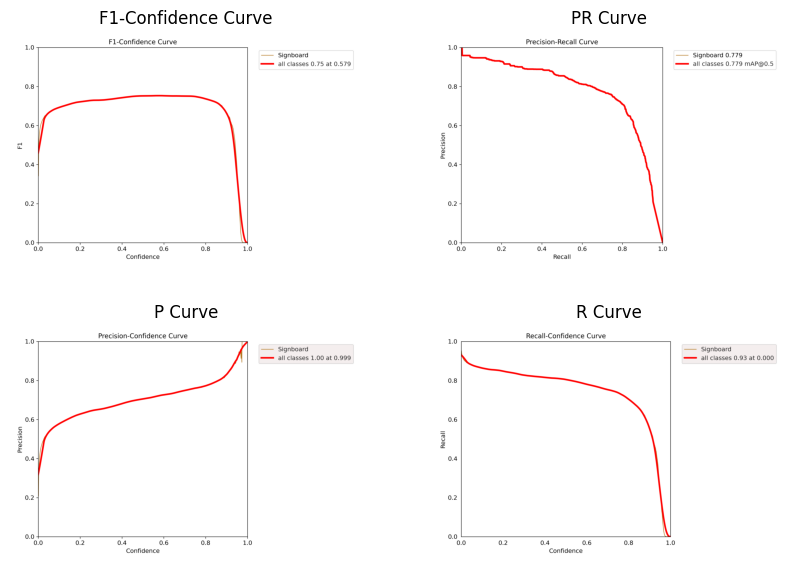

In [28]:
fig = plt.figure(figsize=(10, 7))

Image1 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Validation/F1_curve.png')
Image2 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Validation/PR_curve.png')
Image3 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Validation/P_curve.png')
Image4 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Validation/R_curve.png')

fig.add_subplot(2, 2, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("F1-Confidence Curve")

fig.add_subplot(2, 2, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("PR Curve")

fig.add_subplot(2, 2, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("P Curve")

fig.add_subplot(2, 2, 4)
plt.imshow(Image4)
plt.axis('off')
plt.title("R Curve")

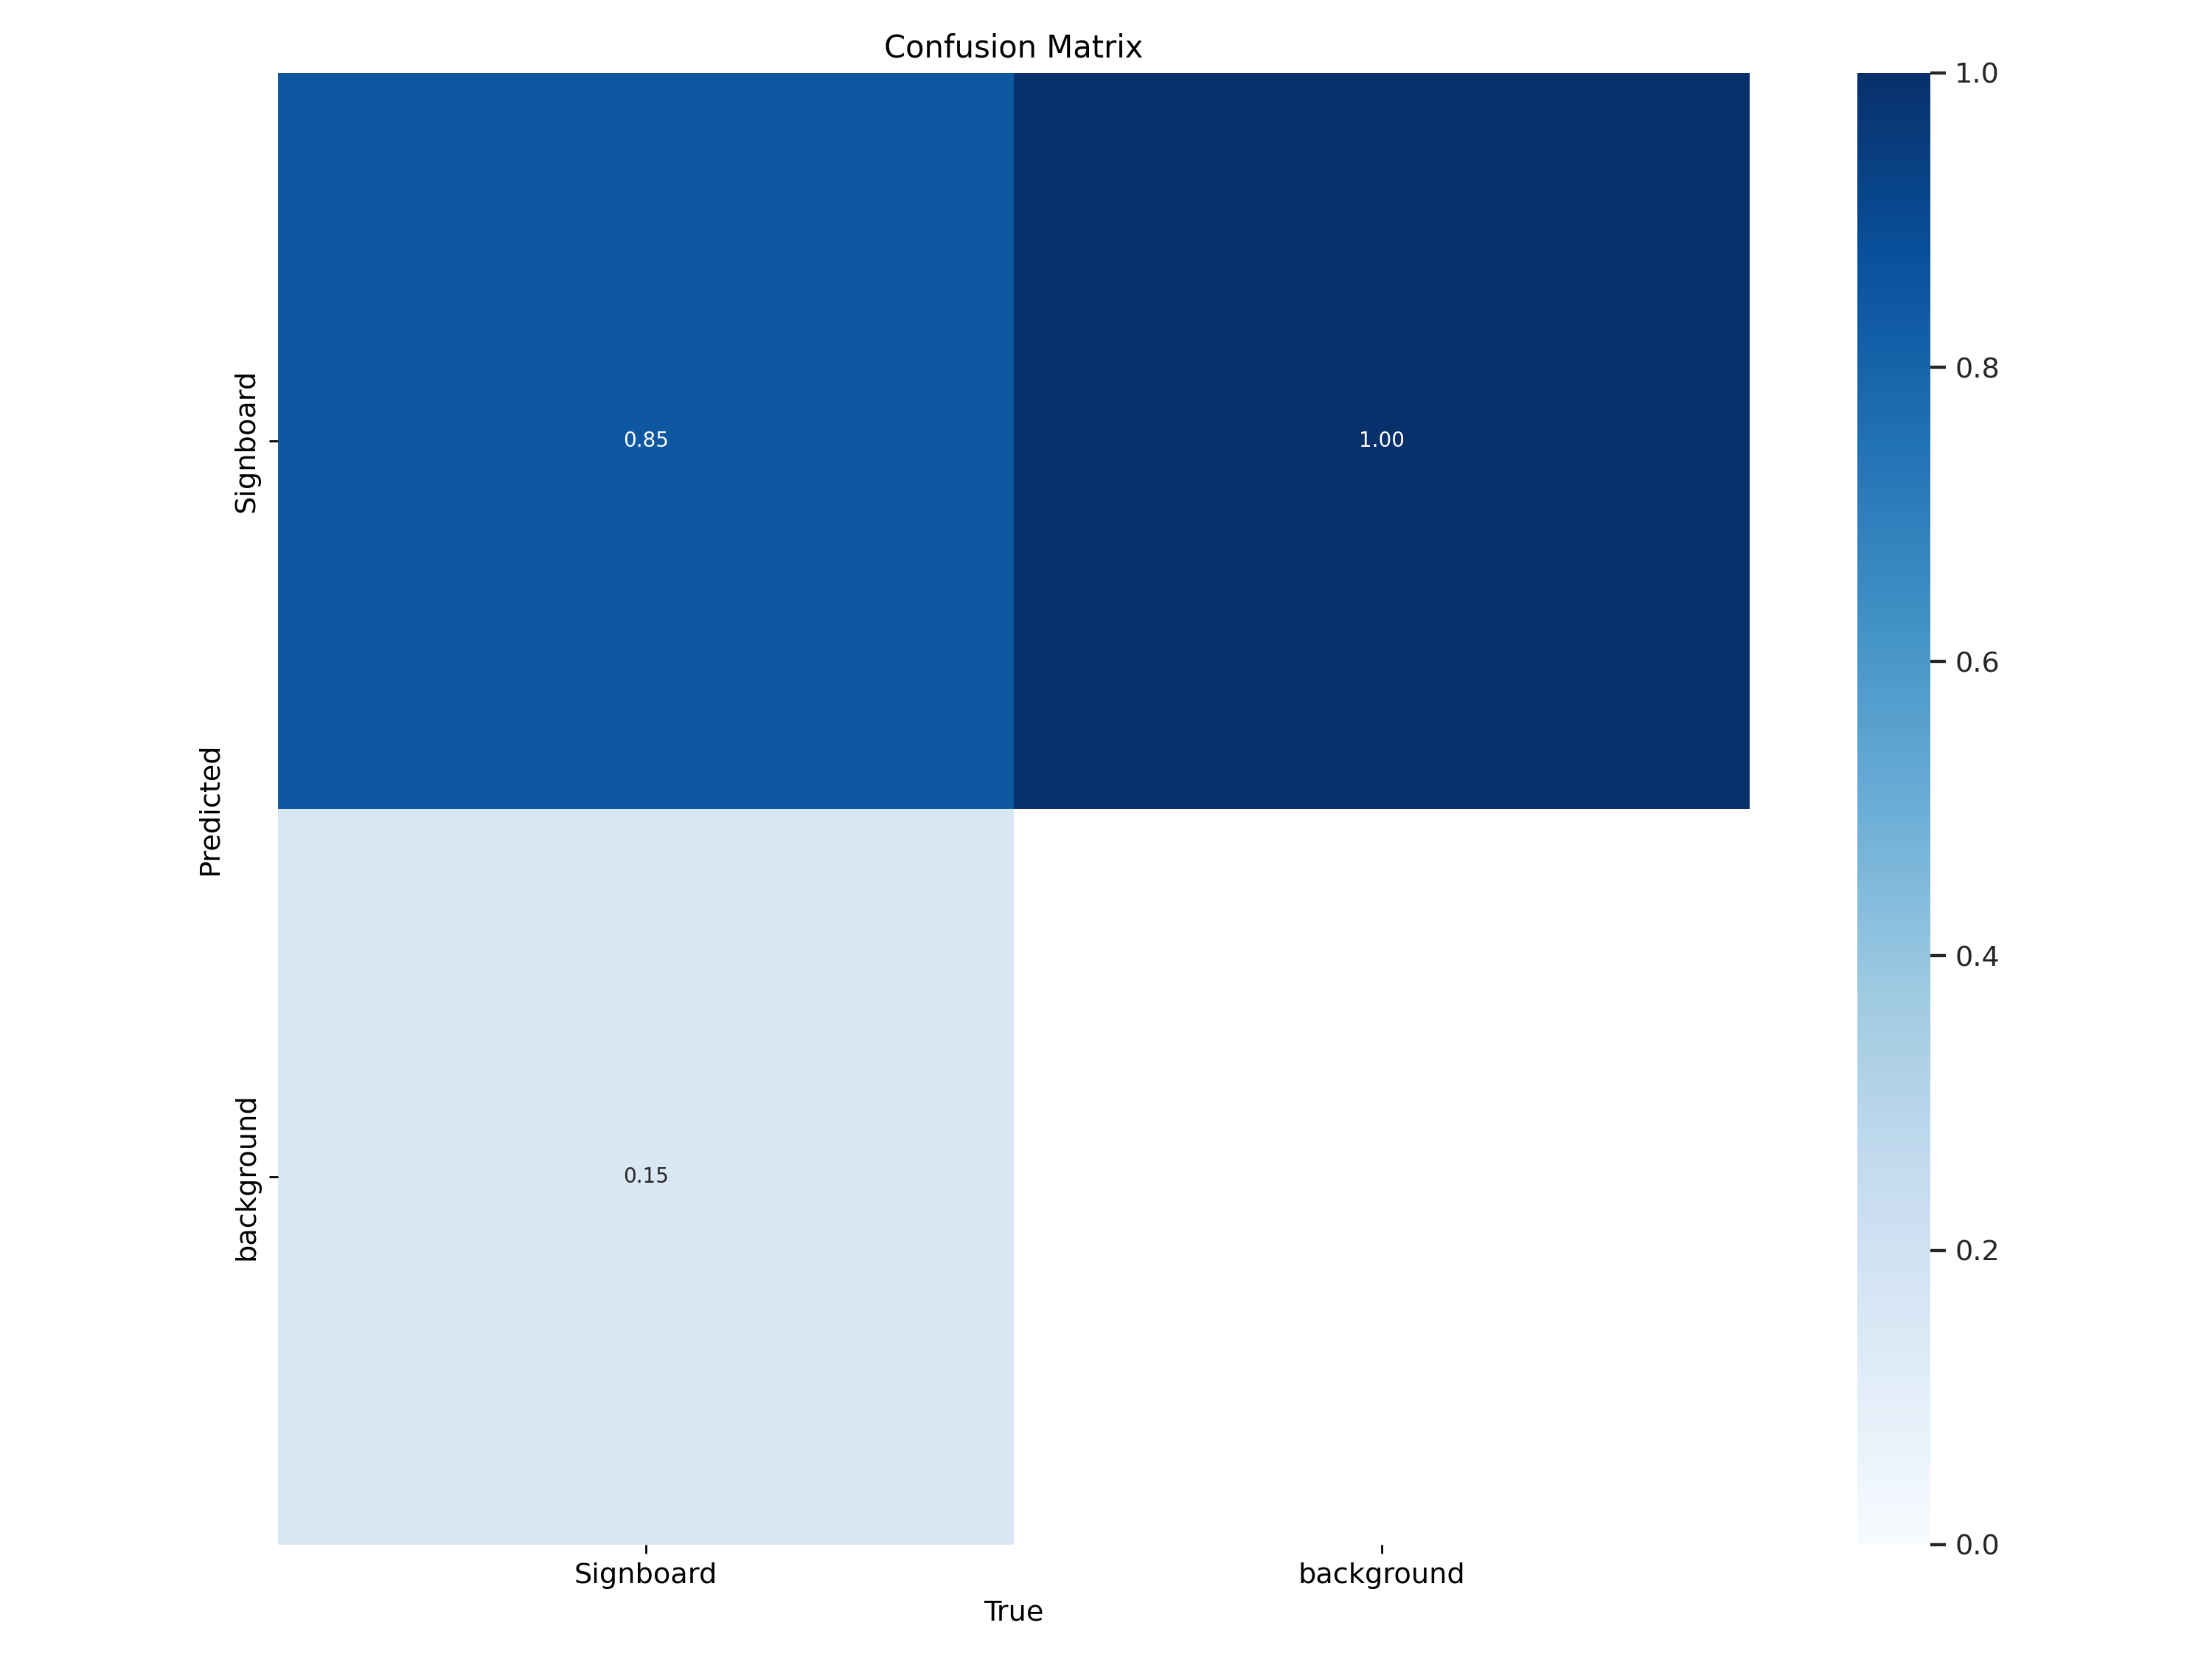

In [29]:
Image(filename='/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Validation/confusion_matrix.png', width=800)

Text(0.5, 1.0, 'Predictions')

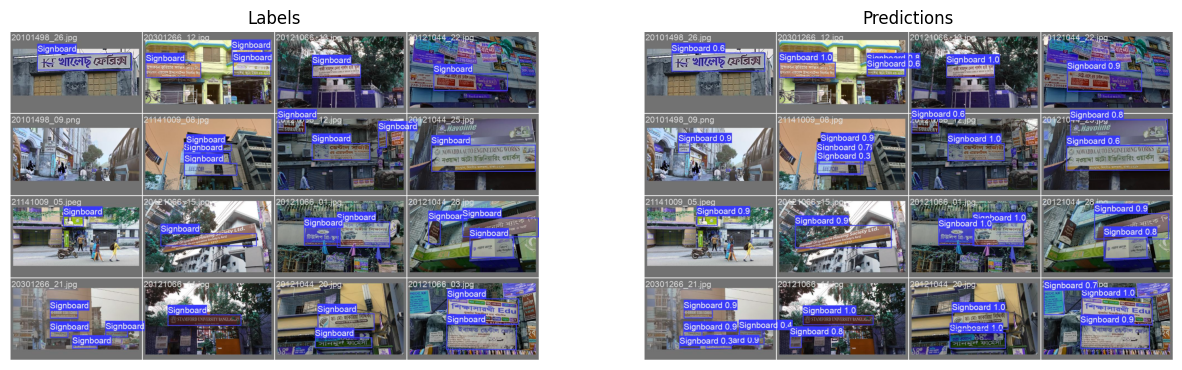

In [30]:
fig = plt.figure(figsize=(15, 10))

Image1 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Validation/val_batch0_labels.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Validation/val_batch0_pred.jpg')

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Labels")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Predictions")

# Test using best.pt

In [38]:
%cd /content/drive/MyDrive/Milestone- G5/yolov5

/content/drive/MyDrive/Milestone- G5/yolov5


In [39]:
!python test.py --batch 60 --data dataset.yaml --weights 'runs/train/yolov5s_results/weights/best.pt' --task test --name 'yolov5s Test' --augment --save-txt

test: data=dataset.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], batch_size=60, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolov5s Test, exist_ok=False, half=False, dnn=False
fatal: cannot change to '/content/drive/MyDrive/Milestone-': No such file or directory
YOLOv5 🚀 2024-4-22 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/Milestone- G5/section1-group5/test.cache... 362 images, 2 backgrounds, 2 corrupt: 100% 362/362 [00:00<?, ?it/s]
test: WARNING ⚠️ /content/drive/MyDrive/Milestone- G5/section1-group5/test/19121070_07.jpg: corrupt JPEG restored and saved
test: WARNING ⚠️ /content/drive/MyDrive/Milestone- G5/section1-group5/test/19121070_13.jpg: 

Text(0.5, 1.0, 'R Curve')

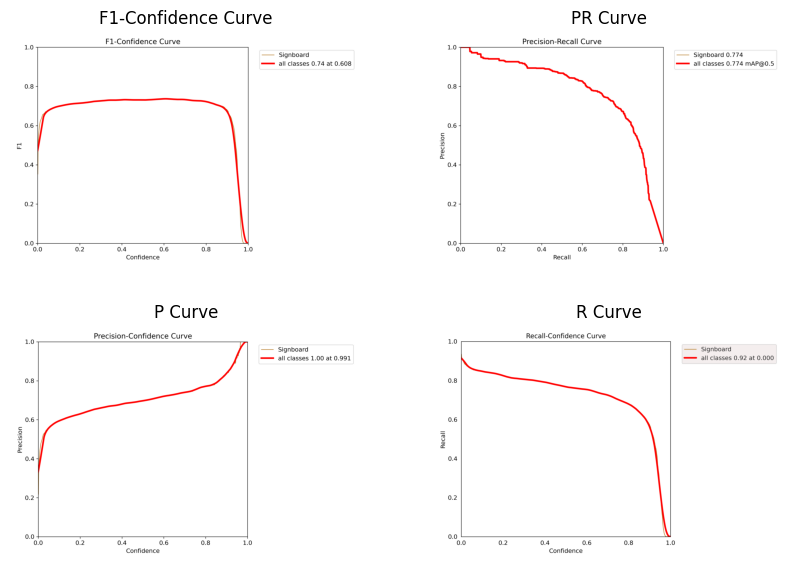

In [35]:
fig = plt.figure(figsize=(10, 7))

Image1 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Test/F1_curve.png')
Image2 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Test/PR_curve.png')
Image3 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Test/P_curve.png')
Image4 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Test/R_curve.png')

fig.add_subplot(2, 2, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("F1-Confidence Curve")

fig.add_subplot(2, 2, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("PR Curve")

fig.add_subplot(2, 2, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("P Curve")

fig.add_subplot(2, 2, 4)
plt.imshow(Image4)
plt.axis('off')
plt.title("R Curve")

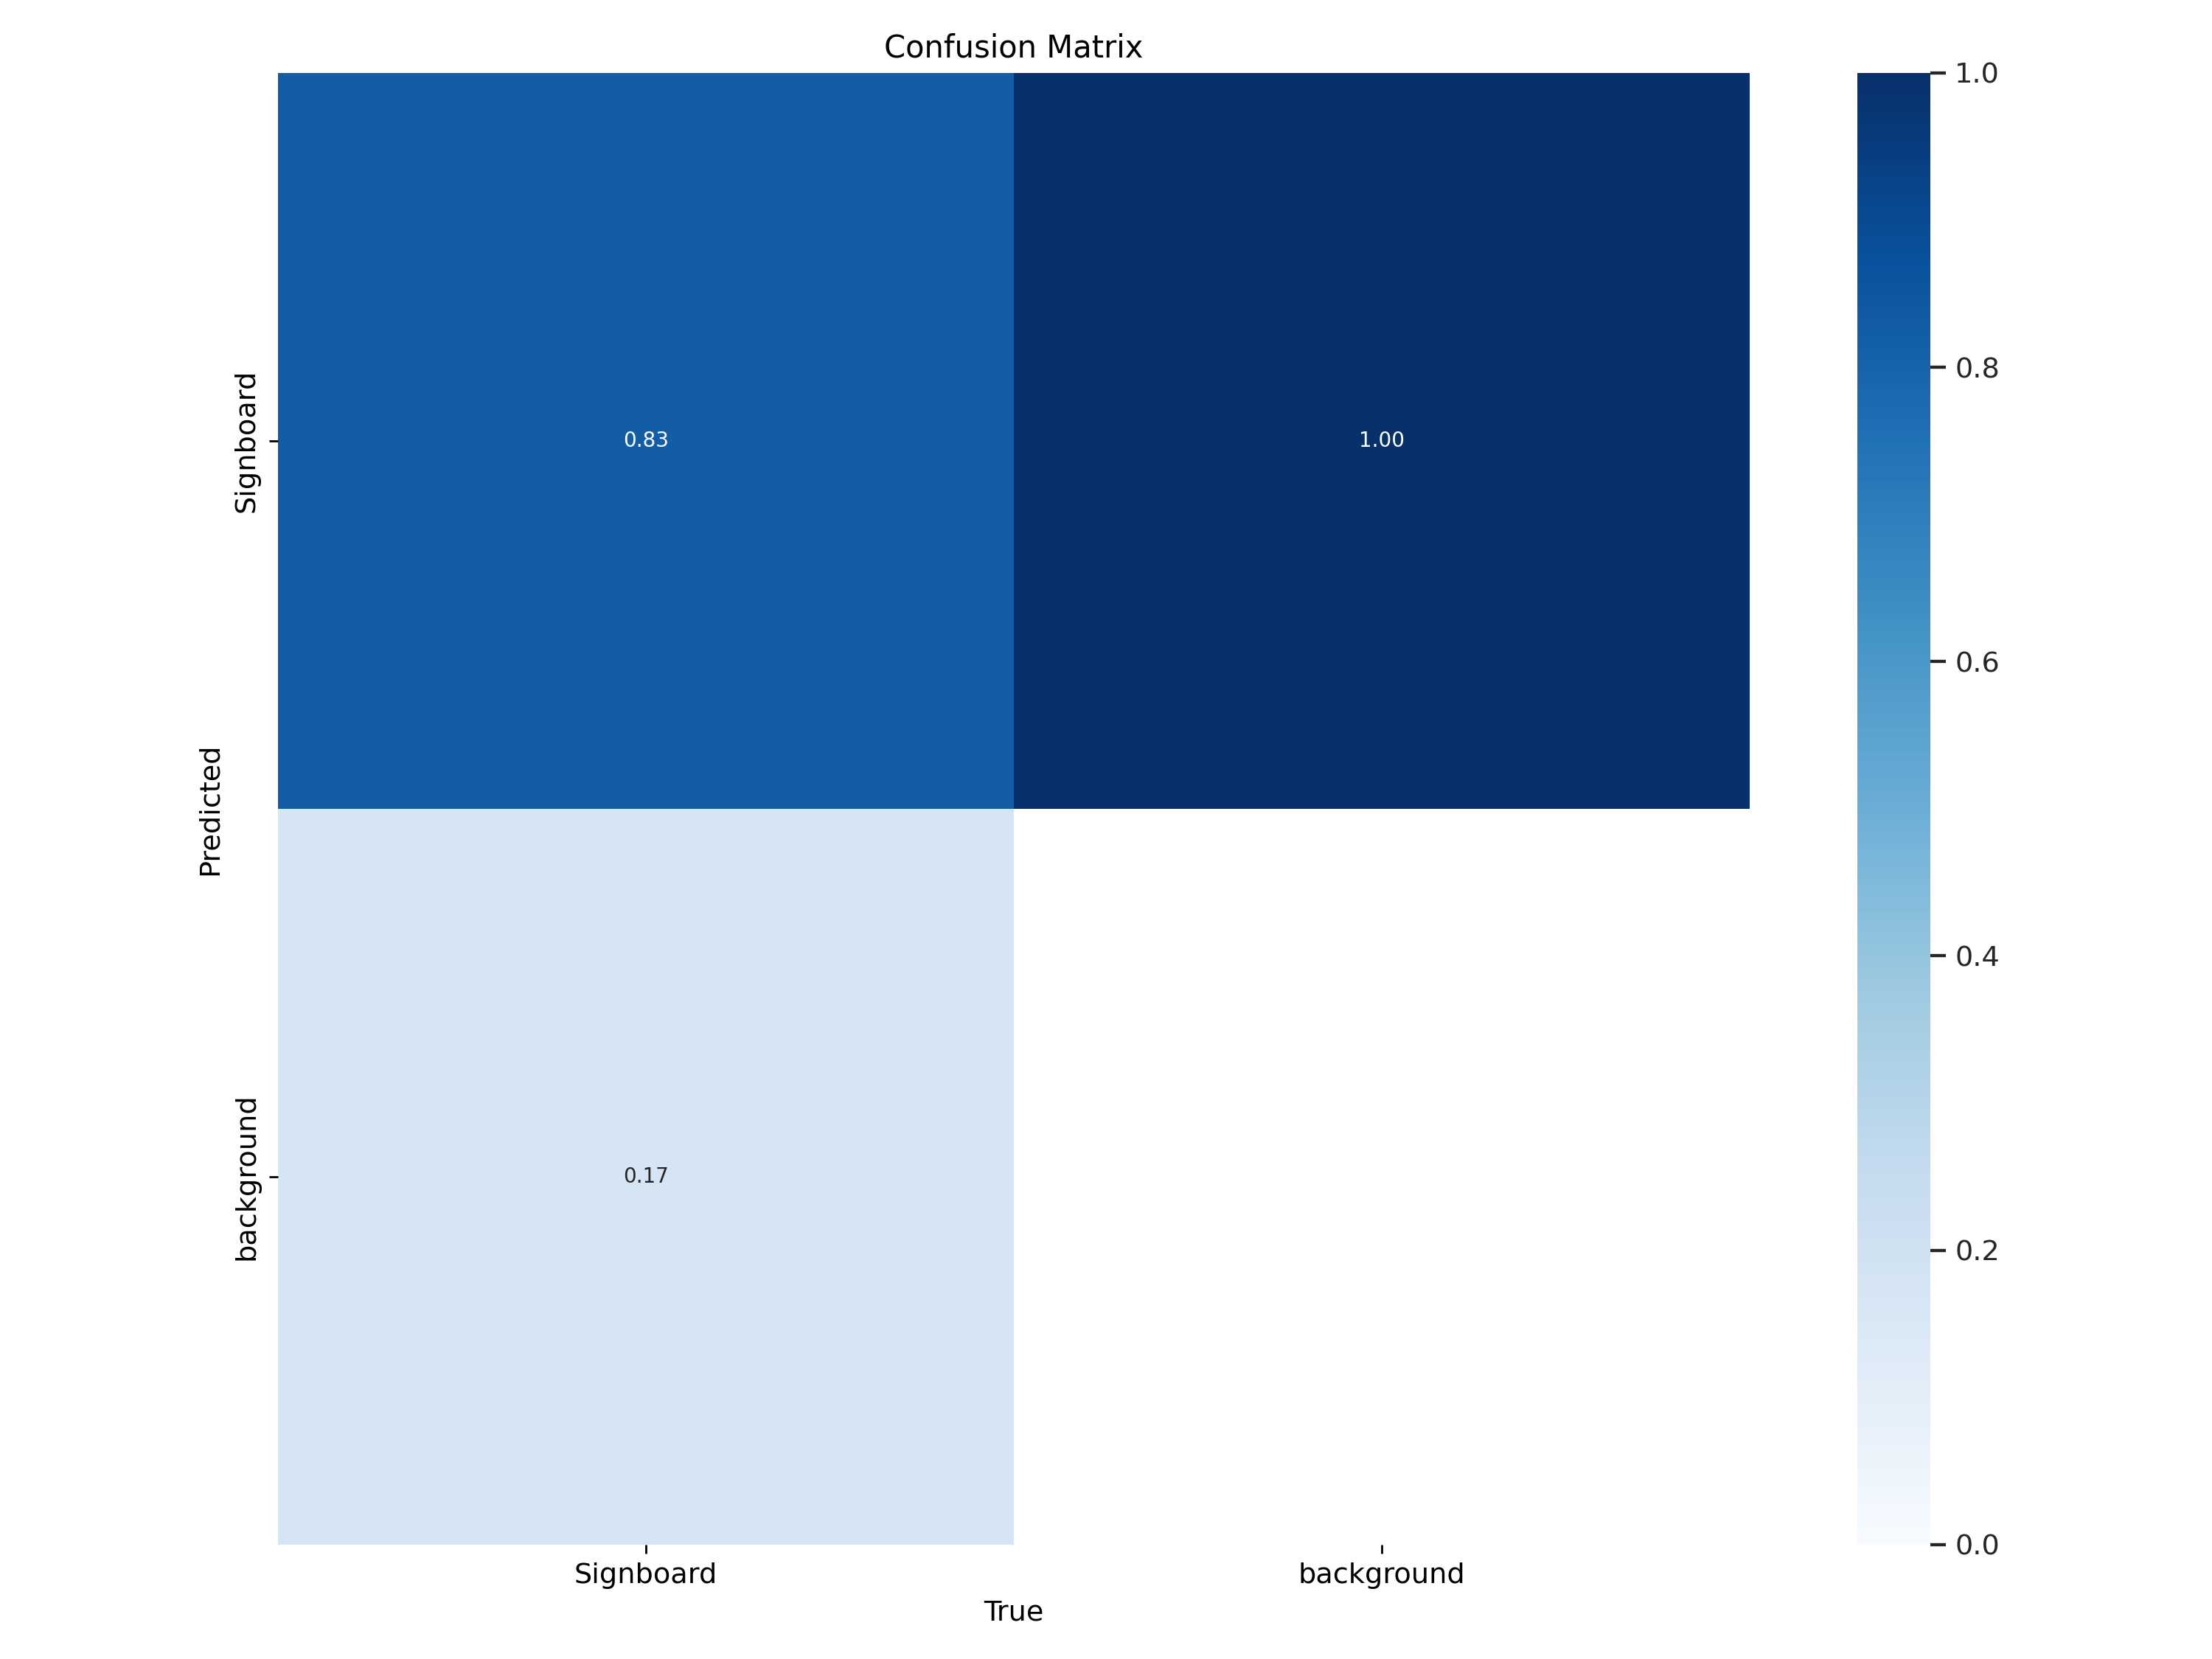

In [36]:
Image(filename='/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Test/confusion_matrix.png', width=800)

Text(0.5, 1.0, 'Predictions')

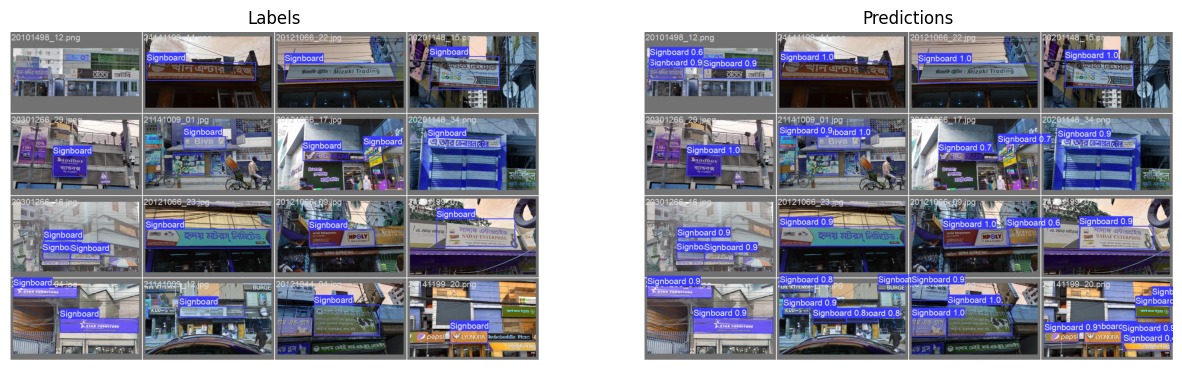

In [37]:
fig = plt.figure(figsize=(15, 10))

Image1 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Test/val_batch0_labels.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/Milestone- G5/yolov5/runs/val/yolov5s Test/val_batch0_pred.jpg')

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Labels")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Predictions")

# IoU

In [41]:
%cd /content/drive/MyDrive/Milestone- G5/

/content/drive/MyDrive/Milestone- G5


In [12]:
# function to compute IoU for predicted versus ground truth labels
def compute_iou(gt_box, pred_box):
    x1, y1, w1, h1 = gt_box
    x2, y2, w2, h2 = pred_box

    # produce BBox coordinates from YOLO data
    xmin_gt_box = x1 - w1 / 2
    ymin_gt_box = y1 - h1 / 2
    xmax_gt_box = x1 + w1 / 2
    ymax_gt_box = y1 + h1 / 2

    xmin_pred_box = x2 - w2 / 2
    ymin_pred_box = y2 - h2 / 2
    xmax_pred_box = x2 + w2 / 2
    ymax_pred_box = y2 + h2 / 2

    # calculate intersection of two boxes
    xmin_inter = max(xmin_gt_box, xmin_pred_box)
    ymin_inter = max(ymin_gt_box, ymin_pred_box)
    xmax_inter = min(xmax_gt_box, xmax_pred_box)
    ymax_inter = min(ymax_gt_box, ymax_pred_box)
    inter_area = max(0, xmax_inter - xmin_inter) * max(0, ymax_inter - ymin_inter)

    # calculate union of two boxes
    gt_box_area = w1 * h1
    pred_box_area = w2 * h2
    union_area = gt_box_area + pred_box_area - inter_area

    # IoU equation
    iou = inter_area / union_area if union_area != 0 else 0
    return iou

For Validation

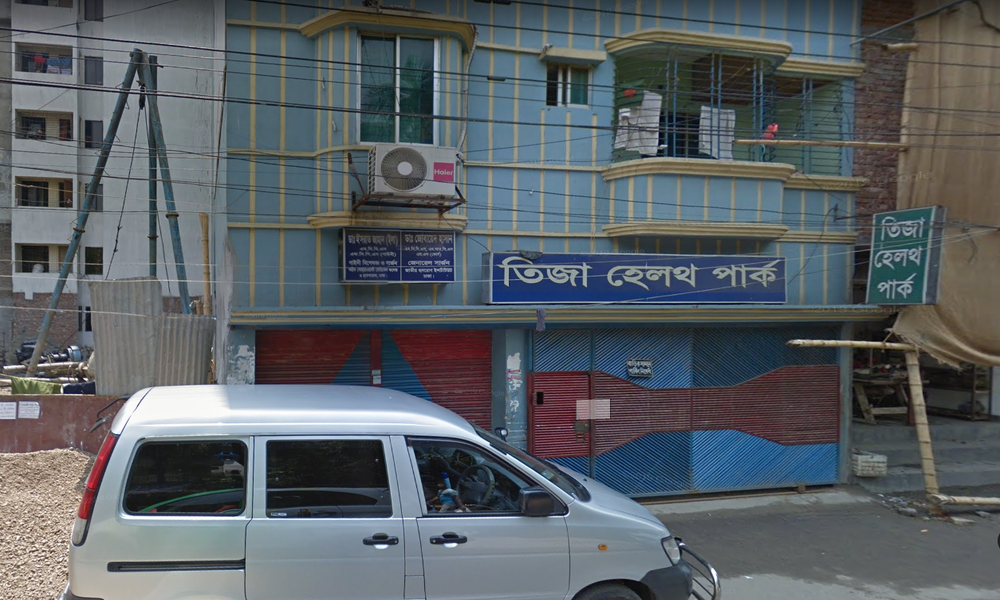

In [44]:
Image(filename='section1-group5/val/1009.png', width=400)

In [45]:
# Function to convert all elements in a list to float
def convert_to_float(lst):
    return [float(item) for item in lst]

# List to store ground truth coordinates
gt_labels = []
with open('section1-group5/val/1009.txt', 'r') as file: # path of the ground truth labels
    print("\tGround Truth Predictions")
    temp = file.readlines()
    for line in range(len(temp)):
        # Split each line into a list of values and convert to float
        gt_labels.append(convert_to_float(temp[line].split()))
    print(*gt_labels, sep="\n")

# List to store prediction coordinates
pred_labels = []
with open('yolov5/runs/val/yolov5s Validation/labels/1009.txt', 'r') as file: # path of the prediction labels
    print("\tPredictions")
    temp = file.readlines()
    for line in range(len(temp)):
        # Split each line into a list of values and convert to float
        pred_labels.append(convert_to_float(temp[line].split()))
    print(*pred_labels, sep="\n")

	Ground Truth Predictions
[0.0, 0.64, 0.462958, 0.29334, 0.088883]
	Predictions
[0.0, 0.639607, 0.465803, 0.296992, 0.0851727]
[0.0, 0.399294, 0.429817, 0.113888, 0.085806]
[0.0, 0.909625, 0.425049, 0.0806727, 0.152686]
[0.0, 0.436218, 0.999808, 0.346329, 0.000383097]
[0.0, 0.635778, 0.465192, 0.131407, 0.0850303]
[0.0, 0.400722, 0.430113, 0.0714436, 0.0752898]


In [46]:
# Have to select the box manually
gt_box = gt_labels[0][1::]
pred_box = pred_labels[0][1::]

iou = compute_iou(gt_box, pred_box)
print("IoU:", iou)

IoU: 0.9257655720430372


For Test

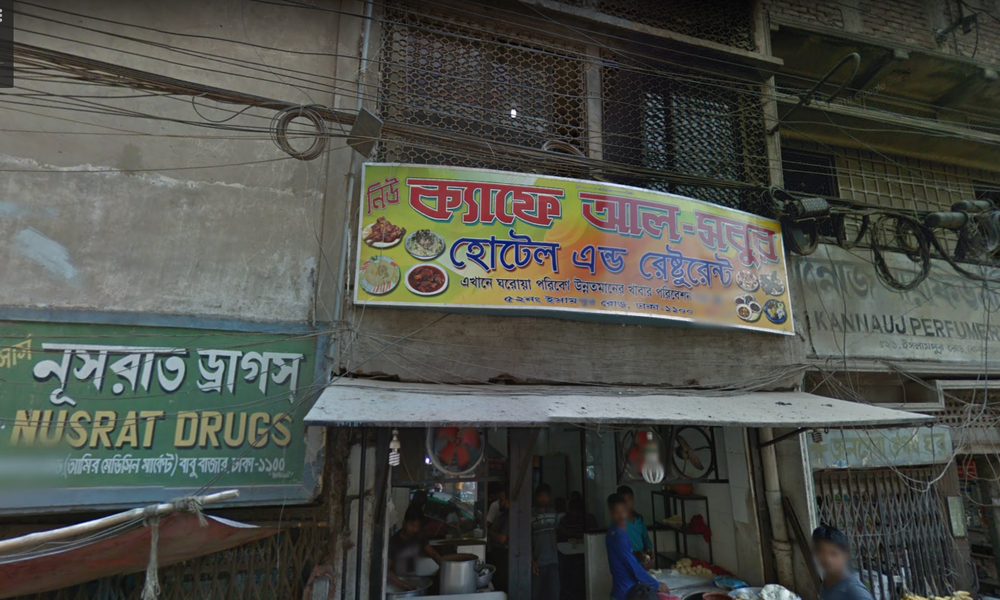

In [20]:
Image(filename='section1-group5/test/1006.png', width=400)

In [17]:
# Function to convert all elements in a list to float
def convert_to_float(lst):
    return [float(item) for item in lst]

# List to store ground truth coordinates
gt_labels = []
with open('section1-group5/test/1006.txt', 'r') as file: # path of the ground truth labels
    print("\tGround Truth Predictions")
    temp = file.readlines()
    for line in range(len(temp)):
        # Split each line into a list of values and convert to float
        gt_labels.append(convert_to_float(temp[line].split()))
    print(*gt_labels, sep="\n")

# List to store prediction coordinates
pred_labels = []
with open('yolov5/runs/val/yolov5s Test/labels/1006.txt', 'r') as file: # path of the prediction labels
    print("\tPredictions")
    temp = file.readlines()
    for line in range(len(temp)):
        # Split each line into a list of values and convert to float
        pred_labels.append(convert_to_float(temp[line].split()))
    print(*pred_labels, sep="\n")

	Ground Truth Predictions
[0.0, 0.574075, 0.417283, 0.45185, 0.3111]
	Predictions
[0.0, 0.576152, 0.3991, 0.448595, 0.263178]
[0.0, 0.888603, 0.482328, 0.222794, 0.307773]
[0.0, 0.158019, 0.689017, 0.309098, 0.301718]
[0.0, 0.589971, 0.401649, 0.128012, 0.25701]


In [19]:
# Have to select the box manually
gt_box = gt_labels[0][1::]
pred_box = pred_labels[0][1::]

iou = compute_iou(gt_box, pred_box)
print("IoU:", iou)

IoU: 0.8383183899934641


# Results

In [ ]:
%cat '/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/hyp.yaml'

lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1
box: 0.05
cls: 0.5
cls_pw: 1.0
obj: 1.0
obj_pw: 1.0
iou_t: 0.2
anchor_t: 4.0
fl_gamma: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 0.0
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 1.0
mixup: 0.0
copy_paste: 0.0


In [ ]:
%cat '/content/drive/MyDrive/Milestone- G5/yolov5/runs/train/yolov5s_results/opt.yaml'

weights: yolov5s.pt
cfg: models/yolov5s.yaml
data: dataset.yaml
hyp:
  lr0: 0.01
  lrf: 0.01
  momentum: 0.937
  weight_decay: 0.0005
  warmup_epochs: 3.0
  warmup_momentum: 0.8
  warmup_bias_lr: 0.1
  box: 0.05
  cls: 0.5
  cls_pw: 1.0
  obj: 1.0
  obj_pw: 1.0
  iou_t: 0.2
  anchor_t: 4.0
  fl_gamma: 0.0
  hsv_h: 0.015
  hsv_s: 0.7
  hsv_v: 0.4
  degrees: 0.0
  translate: 0.1
  scale: 0.5
  shear: 0.0
  perspective: 0.0
  flipud: 0.0
  fliplr: 0.5
  mosaic: 1.0
  mixup: 0.0
  copy_paste: 0.0
epochs: 100
batch_size: -1
imgsz: 640
rect: false
resume: false
nosave: false
noval: false
noautoanchor: false
noplots: false
evolve: null
evolve_population: data/hyps
resume_evolve: null
bucket: ''
cache: ram
image_weights: false
device: ''
multi_scale: false
single_cls: false
optimizer: SGD
sync_bn: false
workers: 8
project: runs/train
name: yolov5s_results
exist_ok: false
quad: false
cos_lr: false
label_smoothing: 0.0
patience: 100
freeze:
- 0
save_period: -1
seed: 0
local_rank: -1
entity: null